In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('humana_3.csv')

/Users/duytienpham/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#drug_group_descrp is a good indicator for what kind of disease the patient is going through -
#will eliminate gpi_drug_class + drug_group_id6 + status_code + specialty2/3 + days + supply_cnt + drug_type + diagnosis + disposition_descr + brand_name + drug_group_id + location + generic_name + ndc_id + supply_rejected
df.drop(columns = ['Unnamed: 0','Unnamed: 0.1','call_category','gpi_drug_id8','Days','PAY_DAY_SUPPLY_CNT_Opioid','PAYABLE_QTY','DRUG_TYPE','Specialty2','Specialty3','gpi_drug_class','status_code','inquiry_reason_descrp','drug_group_id6','disposition_descr', 'cob','brand_name','claim_tier','drug_group_id','location','generic_name','ndc_id','pay_day_supply_cnt_Rejected'], inplace = True)



In [5]:
#EVENT_DESCR
claim_df = pd.DataFrame(df[['id','event_descr']].groupby(['id','event_descr']).size()).reset_index().rename(columns = {0:'count'})
claim = pd.DataFrame()
for i in claim_df['id'].unique().tolist():
    temp = claim_df[claim_df['id']==i]
    descr_part = temp.iloc[:,1:]
    descr_part = descr_part.transpose()
    descr_part = descr_part.rename(columns = descr_part.iloc[0,:]).drop(descr_part.index[0]).rename(index = {'count':i})
    claim = pd.concat([claim,descr_part])
claim.fillna(0, inplace = True)   
claim= claim.reset_index().rename(columns = {'index':'id'})

/Users/duytienpham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [7]:
def substance_abuse_tendency(row):
    if row['event_descr'] == 'Fully Paid Claim':
        if pd.isna(row['drug_group_descrp']) == False and len(set(str(row['drug_group_descrp']).upper().split(' ')).intersection(set['SUBSTANCE', 'ALCOHOL', 'MENTAL', 'BIPOLAR', 'HEMATOLOGY','ONCOLOGY', 'PSYCHOTIC', 'PSYCHOSIS', 'PSYCHOPHYSIOLOGIC', 'PSYCHOSOCIAL', 'PSYCHOLOGICAL'])) != 0:
            return 1
        else:
            return 0
        
df['high_risk_diagnosis'] = df.apply(substance_abuse_tendency, axis = 1)


In [8]:
#merge processed specialty to df
specialty = pd.read_excel('specialty.xlsx')
specialty.fillna(0,inplace = True)
df = df.merge(specialty, on = ['event_descr','Specialty'], how = 'left')
df.fillna(0, inplace = True)

In [9]:
specialty.columns

Index(['event_descr', 'Specialty', 'Surgery', 'Cancer',
       'Mental Health / Addiction Med', 'Emergency / Critical Care', 'Dentist',
       'Pain Medicine / Therepy', 'Other Specialties', 'General Medicine'],
      dtype='object')

In [10]:
place_treatment = pd.read_excel('place_treatment.xlsx')
place_treatment.drop(columns = [0], inplace = True)
place_treatment.rename(columns= {'Unnamed: 1':'place_treatment'}, inplace = True)
df = df.merge(place_treatment, on = 'place_treatment', how = 'left')

In [11]:
df.fillna(0, inplace = True)
df.head()

,id,event_descr,MME_Opioid,Specialty,diagnosis,place_treatment,charge_amt,rx_cost,origin,net_paid_amt,drug_group_descrp,member_responsible_amt,drug_typeIR_Opioid,drug_typeER_Opioid,priority,high_risk_diagnosis,Surgery,Cancer,Mental Health / Addiction Med,Emergency / Critical Care,Dentist,Pain Medicine / Therepy,Other Specialties,General Medicine,_treatment_place_high_risk
0,ID10010854159,RX Claim - Paid,0.0,0,0,0,0.0,5.0,0,2.35,DIABETES,2.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID10010854159,RX Claim - Paid,0.0,0,0,0,0.0,5.0,0,2.35,CARDIO,2.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ID10010854159,RX Claim - Rejected,0.0,0,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",0,0.0,0.0,0,0.00,0,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ID10010854159,RX Claim - Paid,0.0,0,0,0,0.0,5.8,0,3.15,INF-ANTIBIOTICS,2.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ID10010854159,RX Claim - Paid,0.0,0,0,0,0.0,13.0,0,10.35,CARDIO,2.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.columns

Index(['id', 'event_descr', 'MME_Opioid', 'Specialty', 'diagnosis',
       'place_treatment', 'charge_amt', 'rx_cost', 'origin', 'net_paid_amt',
       'drug_group_descrp', 'member_responsible_amt', 'drug_typeIR_Opioid',
       'drug_typeER_Opioid', 'priority', 'high_risk_diagnosis', 'Surgery',
       'Cancer', 'Mental Health / Addiction Med', 'Emergency / Critical Care',
       'Dentist', 'Pain Medicine / Therepy', 'Other Specialties',
       'General Medicine', '_treatment_place_high_risk'],
      dtype='object')

In [13]:

Surgery_df = pd.DataFrame(df[['id','Surgery']].groupby('id').sum()).reset_index().rename(columns = {0:'Surgery_Cnt'})
addiction_df = pd.DataFrame(df[['id','Mental Health / Addiction Med']].groupby('id').sum()).reset_index().rename(columns = {0:'addiction_mentalHealth_Cnt'})
emergency_df = pd.DataFrame(df[['id','Emergency / Critical Care']].groupby('id').sum()).reset_index().rename(columns = {0:'Emergency_Cnt'})
Cancer_df = pd.DataFrame(df[['id','Cancer']].groupby('id').sum()).reset_index().rename(columns = {0:'Cancer_Cnt'})
therapy_pain_df = pd.DataFrame(df[['id','Pain Medicine / Therepy']].groupby('id').sum()).reset_index().rename(columns = {0:'therapy_pain_Cnt'})
general_df = pd.DataFrame(df[['id','General Medicine']].groupby('id').sum()).reset_index().rename(columns = {0:'general_medicine_Cnt'})
other_specialties_df = pd.DataFrame(df[['id','Other Specialties']].groupby('id').sum()).reset_index().rename(columns = {0:'other_specialties_Cnt'})


In [14]:
Surgery_df.head()

,id,Surgery
0,ID10010854159,0.0
1,ID10013863216,0.0
2,ID10024447278,0.0
3,ID1002482139,2.0
4,ID1003386406,0.0


In [15]:
#MME_Opioid
MME_Opioid_df = pd.DataFrame(df[['id','MME_Opioid']].groupby('id').sum()).reset_index().rename(columns = {0:'Total_MME_Opioid'})
charge_amt_df = pd.DataFrame(df[['id','charge_amt']].groupby('id').sum()).reset_index().rename(columns = {0:'Total_charge_amt'})
rx_cost_df = pd.DataFrame(df[['id','rx_cost']].groupby('id').sum()).reset_index().rename(columns = {0:'Total_rx_cost'})
net_paid_amt_df = pd.DataFrame(df[['id','net_paid_amt']].groupby('id').sum()).reset_index().rename(columns = {0:'Total_net_paid_amt'})
high_risk_df = pd.DataFrame(df[['id','_treatment_place_high_risk']].groupby('id').sum()).reset_index().rename(columns = {0:'Total_highrisk_treatment_places'})
ir = pd.DataFrame(df[['id','drug_typeIR_Opioid']].groupby('id').sum()).reset_index().rename(columns = {0:'Total_drug_typeIR_Opioid'})
er = pd.DataFrame(df[['id','drug_typeER_Opioid']].groupby('id').sum()).reset_index().rename(columns = {0:'Total_drug_typeER_Opioid'})
member_responsible_amt = pd.DataFrame(df[['id','member_responsible_amt']].groupby('id').sum()).reset_index().rename(columns = {0:'Total_member_responsible_amt'})
priority = pd.DataFrame(df[['id','priority']].groupby('id').sum()).reset_index().rename(columns = {0:'Total_priority'})

In [16]:
df.head(50)

,id,event_descr,MME_Opioid,Specialty,diagnosis,place_treatment,charge_amt,rx_cost,origin,net_paid_amt,drug_group_descrp,member_responsible_amt,drug_typeIR_Opioid,drug_typeER_Opioid,priority,high_risk_diagnosis,Surgery,Cancer,Mental Health / Addiction Med,Emergency / Critical Care,Dentist,Pain Medicine / Therepy,Other Specialties,General Medicine,_treatment_place_high_risk
0,ID10010854159,RX Claim - Paid,0.0,0,0,0,0.0,5.00,0,2.35,DIABETES,2.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ID10010854159,RX Claim - Paid,0.0,0,0,0,0.0,5.00,0,2.35,CARDIO,2.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ID10010854159,RX Claim - Rejected,0.0,0,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",0,0.0,0.00,0,0.00,0,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ID10010854159,RX Claim - Paid,0.0,0,0,0,0.0,5.80,0,3.15,INF-ANTIBIOTICS,2.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ID10010854159,RX Claim - Paid,0.0,0,0,0,0.0,13.00,0,10.35,CARDIO,2.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ID10010854159,RX Claim - Paid,0.0,0,0,0,0.0,5.00,0,2.35,CARDIO,2.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ID10010854159,RX Claim - Paid,0.0,0,0,0,0.0,5.00,0,2.35,DIABETES,2.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ID10010854159,Fully Paid Claim,0.0,0,"ALLERGIC RHINITIS, CAUSE UNSPECIFIED",OFFICE,100.0,0.00,0,0.00,0,67.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ID10010854159,RX Claim - New Drug,0.0,0,0,0,0.0,0.00,0,0.00,RESPIRATORY,2.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ID10010854159,RX Claim - Paid,0.0,0,0,0,0.0,8.20,0,5.55,RESPIRATORY,2.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from functools import reduce

data_frames = [claim, Surgery_df,addiction_df,therapy_pain_df,emergency_df,other_specialties_df,Cancer_df,general_df,MME_Opioid_df,charge_amt_df,rx_cost_df,net_paid_amt_df,high_risk_df,ir,er,member_responsible_amt,priority]

df_merged = reduce(lambda left,right: pd.merge(left,right,on=['id'], how='outer'), data_frames)

In [19]:
#LTOT identification
LTOT_id = pd.read_csv('LTOT_identification.csv')
LTOT_id = LTOT_id[['id','LTOT_prior','naive_claim','LTOT_after']]
LTOT_id = (LTOT_id.groupby('id').sum()).reset_index()
lst= [1 if i != 0 else 0 for i in LTOT_id['LTOT_after']]
LTOT_id['LTOT_after'] = lst

In [21]:
df_merged= df_merged.merge(LTOT_id, how='left', on = 'id')
df_merged.dropna(inplace = True)

In [1]:
# df_merged.head()

In [23]:
# df_merged.drop(columns = 'Surgery', inplace = True)

In [24]:
df_merged.to_csv('Humana_Analysis.csv')

In [25]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df_merged.corr()
corr.style.background_gradient(cmap='coolwarm')

,Fully Paid Claim,Inbound Call by Mbr,Inbound Call by Other,Inbound Call by Prov,New diagnosis - CAD,New diagnosis - CHF,New diagnosis - CPD,New diagnosis - Diabetes,New diagnosis - Hypertension,New diagnosis - Top 5,New provider,RX Claim - First Time Mail Order,RX Claim - New Drug,RX Claim - Paid,RX Claim - Rejected,Surgery_x,Surgery_y,Mental Health / Addiction Med,Pain Medicine / Therepy,Emergency / Critical Care,Other Specialties,Cancer,General Medicine,MME_Opioid,charge_amt,rx_cost,net_paid_amt,_treatment_place_high_risk,drug_typeIR_Opioid,drug_typeER_Opioid,member_responsible_amt,priority,LTOT_prior,naive_claim,LTOT_after
Fully Paid Claim,1,0.189401,0.224978,0.512262,0.149389,0.24388,0.134286,0.0418314,-0.0479386,-0.0749699,0.622558,0.0340048,0.542431,0.47447,0.446183,0.395117,0.109407,0.0274655,0.124765,0.0694042,0.0346802,0.0965757,0.119844,0.107336,0.62428,0.226068,0.619553,0.756756,0.203963,0.114935,0.353706,0.249933,0.108122,0.145562,0.0399035
Inbound Call by Mbr,0.189401,1,0.261115,0.288749,0.0326354,0.0518553,0.0189335,0.0326664,0.012311,-0.00104078,0.230343,0.107283,0.208076,0.184852,0.265685,0.117703,0.0358555,0.0108732,0.030685,0.0244136,-0.00395657,0.00585732,0.051936,0.0265203,0.0776993,0.145978,0.168806,0.104368,0.0735956,0.0249035,0.173879,0.0815,0.033022,0.0798519,0.0787691
Inbound Call by Other,0.224978,0.261115,1,0.32543,0.0567466,0.0857597,0.0443447,0.0362279,-0.00282858,-0.0167255,0.213011,0.0612997,0.181524,0.160062,0.18433,0.12249,0.0167016,0.0106525,0.0275582,0.0279363,0.0132487,0.0181744,0.0592625,0.0345543,0.132598,0.122025,0.190491,0.179529,0.0682691,0.0456974,0.171135,0.0786466,0.0236628,0.0755032,0.056464
Inbound Call by Prov,0.512262,0.288749,0.32543,1,0.084904,0.128244,0.0584564,0.0481914,0.00284168,-0.0106637,0.524304,0.0491125,0.356309,0.293087,0.361426,0.297342,0.128301,0.0462029,0.15268,0.0659479,0.0467885,0.0696087,0.118238,0.150059,0.382761,0.229692,0.444673,0.455313,0.206342,0.17347,0.348481,0.265742,0.135298,0.141223,0.0643562
New diagnosis - CAD,0.149389,0.0326354,0.0567466,0.084904,1,0.213028,0.137036,0.126368,0.163366,0.156824,0.198859,0.0790148,0.203118,0.0704822,0.0665973,0.0542706,0.00821624,-0.00204222,0.000827173,-0.00855204,0.0200781,0.00970195,0.017279,0.00612703,0.12453,0.0208225,0.104307,0.135719,0.0158408,0.012803,0.0547454,0.0149636,0.0100035,0.0163004,-0.00762141
New diagnosis - CHF,0.24388,0.0518553,0.0857597,0.128244,0.213028,1,0.12213,0.0704188,0.0329497,0.0167392,0.223641,0.0633344,0.228717,0.143813,0.120752,0.0675363,-0.0075036,-0.0210369,-0.00706304,0.0156791,-0.000319381,0.0339656,0.0418989,-0.00307593,0.179729,0.0510483,0.176599,0.242983,0.0275813,0.0159365,0.095122,0.0278252,0.00729194,0.0218272,0.0102138
New diagnosis - CPD,0.134286,0.0189335,0.0443447,0.0584564,0.137036,0.12213,1,0.0677143,0.106567,0.183119,0.17351,0.0561062,0.204647,0.0954806,0.0697455,0.0495808,0.0179266,0.0163192,0.0353118,0.0111968,-0.011688,0.0224276,0.0655617,0.0260816,0.104366,0.0313078,0.0990638,0.111741,0.0795669,0.038426,0.0621352,0.0878116,0.0351235,0.0399163,0.0470422
New diagnosis - Diabetes,0.0418314,0.0326664,0.0362279,0.0481914,0.126368,0.0704188,0.0677143,1,0.254476,0.282206,0.140571,0.13977,0.195937,0.0392358,0.046792,0.0163679,0.0260813,-0.00419495,0.00877679,0.00100078,0.0182537,-0.0033096,0.0251525,0.011868,0.0280249,0.0167145,0.0359356,0.0484928,0.0375058,0.00615349,0.0313818,0.0348468,0.0140257,0.00721271,0.0263402
New diagnosis - Hypertension,-0.0479386,0.012311,-0.00282858,0.00284168,0.163366,0.0329497,0.106567,0.254476,1,0.828697,0.149805,0.186125,0.202719,-0.0725782,-0.0416545,0.00242048,0.0101795,0.00712911,0.017614,-0.00662766,0.0104228,0.00422106,0.00949709,0.0241296,-0.0194203,-0.00679241,-0.0188915,-0.0140959,0.02338,0.0104263,0.0124086,0.0202059,0.00609794,-0.0029679,0.00672332
New diagnosis - Top 5,-0.0749699,-0.00104078,-0.0167255,-0.0106637,0.156824,0.0167392,0.183119,0.282206,0.828697,1,0.134324,0.178434,0.179885,-0.110365,-0.0797267,-0.00572042,0.00625247,

In [26]:
# ex = df_merged.drop(columns = ['Fully Paid Claim', 'Inbound Call by Other', 'RX Claim - Paid','Surgery', 'Surgery_Cnt', 'addiction_mentalHealth_Cnt', 'Emergency_Cnt','Cancer_Cnt', 'general_medicine_Cnt','drug_typeER_Opioid','drug_typeIR_Opioid','RX Claim - New Drug','RX Claim - Rejected','RX Claim - First Time Mail Order','net_paid_amt','charge_amt','member_responsible_amt','rx_cost','Inbound Call by Mbr','Inbound Call by Prov','New diagnosis - CAD','New diagnosis - CHF','New diagnosis - CPD','New diagnosis - Diabetes','New diagnosis - Hypertension','New diagnosis - Top 5','New diagnosis - Top 5','New provider' ])

In [2]:
# df_merged

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = df_merged.iloc[:,1:-1]
y = df_merged.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

/Users/duytienpham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.792


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      2681
         1.0       0.73      0.68      0.70      1509

   micro avg       0.79      0.79      0.79      4190
   macro avg       0.78      0.77      0.77      4190
weighted avg       0.79      0.79      0.79      4190



In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred).ravel() #(tn, fp, fn, tp)

array([2300,  381,  490, 1019])

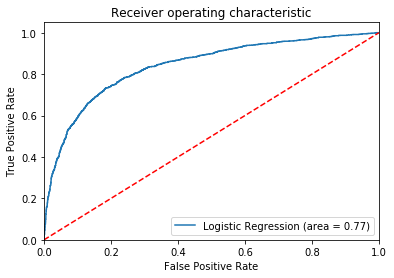

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Predicting holdout dataset

In [85]:
holdout = pd.read_csv('holdout_cleaned.csv')

In [87]:
results = logreg.predict_proba(holdout.iloc[:,2:])
lst = [i[1] for i in results]
holdout['score'] = lst
holdout

,Unnamed: 0,id,Fully Paid Claim,Inbound Call by Mbr,Inbound Call by Other,Inbound Call by Prov,New diagnosis - CAD,New diagnosis - CHF,New diagnosis - CPD,New diagnosis - Diabetes,New diagnosis - Hypertension,New diagnosis - Top 5,New provider,RX Claim - First Time Mail Order,RX Claim - New Drug,RX Claim - Paid,RX Claim - Rejected,Surgery Claim,Surgery_Specialty,Mental Health / Addiction Med,Pain Medicine / Therepy,Emergency / Critical Care,Other Specialties,Cancer,General Medicine,MME_Opioid,charge_amt,rx_cost,net_paid_amt,_treatment_place_high_risk,drug_typeIR_Opioid,drug_typeER_Opioid,member_responsible_amt,priority,LTOT_prior,naive_claim,score
0,0,ID10006701904,81,66,1,20,1,1,0,1,0,0,12,0,10,80,26,1,0.0,0.0,0.0,0.0,0.0,0.0,5.0,75.000000,62925.17,11765.44,28878.90,20.0,5.0,0.0,2069.26,47.0,1.0,1.0,0.309413
1,1,ID10020514442,59,2,0,0,0,1,0,0,0,0,8,0,3,116,5,1,1.0,0.0,0.0,2.0,0.0,0.0,1.0,75.000000,42101.29,884.39,13343.98,11.0,4.0,0.0,3268.85,38.0,0.0,1.0,0.367042
2,2,ID10025902702,37,3,0,1,0,0,0,0,0,0,7,0,8,39,9,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,40.000000,66293.67,500.19,9188.06,10.0,2.0,0.0,1173.24,26.0,0.0,0.0,0.332338
3,3,ID10028172382,48,4,0,3,0,0,0,0,0,0,7,1,6,84,33,0,1.0,0.0,10.0,1.0,0.0,0.0,7.0,334.250000,46927.44,788.37,7109.48,10.0,19.0,0.0,3357.23,189.0,3.0,3.0,0.701188
4,4,ID10034724702,39,2,0,3,0,0,0,0,0,0,9,0,10,77,32,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,86.250000,27970.04,2764.06,6132.46,13.0,3.0,0.0,1294.62,27.5,0.0,1.0,0.291762
5,5,ID10052209072,11,2,1,2,0,0,0,0,0,0,2,0,7,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,52.500000,11745.25,525.56,7438.49,7.0,2.0,0.0,1453.78,21.0,0.0,0.0,0.411623
6,6,ID10052944491,32,4,0,2,1,0,1,0,0,0,6,0,2,53,3,0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,480.000000,18517.73,802.91,5239.40,5.0,13.0,0.0,1374.72,123.5,4.0,1.0,0.654700
7,7,ID1006108150,22,11,0,1,0,0,0,0,0,0,5,0,8,130,20,0,1.0,0.0,0.0,5.0,10.0,0.0,0.0,840.000000,14501.09,6100.24,12286.25,5.0,9.0,7.0,2548.87,186.0,3.0,2.0,0.519434
8,8,ID10070523158,64,13,1,1,0,0,0,0,0,0,7,0,9,89,6,0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,240.000000,28759.44,11659.96,15611.38,5.0,6.0,0.0,104.84,57.0,0.0,1.0,0.340683
9,9,ID1007116120,104,4,0,5,0,0,1,0,0,0,16,0,28,229,70,4,3.0,0.0,0.0,2.0,0.0,0.0,2.0,338.392857,124549.35,15461.52,31456.36,49.0,7.0,0.0,12516.39,73.0,0.0,2.0,0.087670


In [88]:
submission = holdout[['id','score']]

In [111]:
submission.to_csv('scored_holdout.csv')

In [107]:
submission['rank']= submission['score'].rank(ascending = False)
# submission.isna().sum()

/Users/duytienpham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
submission[submission['rank']==1]

,id,score,rank
4583,ID78772907461,0.999292,1.0


In [76]:
holdout.iloc[:,:]

,Unnamed: 0,id,Fully Paid Claim,Inbound Call by Mbr,Inbound Call by Other,Inbound Call by Prov,New diagnosis - CAD,New diagnosis - CHF,New diagnosis - CPD,New diagnosis - Diabetes,New diagnosis - Hypertension,New diagnosis - Top 5,New provider,RX Claim - First Time Mail Order,RX Claim - New Drug,RX Claim - Paid,RX Claim - Rejected,Surgery Claim,Surgery_y,Mental Health / Addiction Med,Pain Medicine / Therepy,Emergency / Critical Care,Other Specialties,Cancer,General Medicine,MME_Opioid,charge_amt,rx_cost,net_paid_amt,_treatment_place_high_risk,drug_typeIR_Opioid,drug_typeER_Opioid,member_responsible_amt,priority,LTOT_prior,naive_claim
0,0,ID10006701904,81,66,1,20,1,1,0,1,0,0,12,0,10,80,26,1,0.0,0.0,0.0,0.0,0.0,0.0,5.0,75.000000,62925.17,11765.44,28878.90,20.0,5.0,0.0,2069.26,47.0,1.0,1.0
1,1,ID10020514442,59,2,0,0,0,1,0,0,0,0,8,0,3,116,5,1,1.0,0.0,0.0,2.0,0.0,0.0,1.0,75.000000,42101.29,884.39,13343.98,11.0,4.0,0.0,3268.85,38.0,0.0,1.0
2,2,ID10025902702,37,3,0,1,0,0,0,0,0,0,7,0,8,39,9,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,40.000000,66293.67,500.19,9188.06,10.0,2.0,0.0,1173.24,26.0,0.0,0.0
3,3,ID10028172382,48,4,0,3,0,0,0,0,0,0,7,1,6,84,33,0,1.0,0.0,10.0,1.0,0.0,0.0,7.0,334.250000,46927.44,788.37,7109.48,10.0,19.0,0.0,3357.23,189.0,3.0,3.0
4,4,ID10034724702,39,2,0,3,0,0,0,0,0,0,9,0,10,77,32,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,86.250000,27970.04,2764.06,6132.46,13.0,3.0,0.0,1294.62,27.5,0.0,1.0
5,5,ID10052209072,11,2,1,2,0,0,0,0,0,0,2,0,7,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,52.500000,11745.25,525.56,7438.49,7.0,2.0,0.0,1453.78,21.0,0.0,0.0
6,6,ID10052944491,32,4,0,2,1,0,1,0,0,0,6,0,2,53,3,0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,480.000000,18517.73,802.91,5239.40,5.0,13.0,0.0,1374.72,123.5,4.0,1.0
7,7,ID1006108150,22,11,0,1,0,0,0,0,0,0,5,0,8,130,20,0,1.0,0.0,0.0,5.0,10.0,0.0,0.0,840.000000,14501.09,6100.24,12286.25,5.0,9.0,7.0,2548.87,186.0,3.0,2.0
8,8,ID10070523158,64,13,1,1,0,0,0,0,0,0,7,0,9,89,6,0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,240.000000,28759.44,11659.96,15611.38,5.0,6.0,0.0,104.84,57.0,0.0,1.0
9,9,ID1007116120,104,4,0,5,0,0,1,0,0,0,16,0,28,229,70,4,3.0,0.0,0.0,2.0,0.0,0.0,2.0,338.392857,124549.35,15461.52,31456.36,49.0,7.0,0.0,12516.39,73.0,0.0,2.0
